In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import tensorflow as tf
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras import Sequential # Deep learning library, used for neural networks
from tensorflow.keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training
import math


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# **Preprosessing**

In [3]:
df = pd.read_csv('csv/BTC-Daily.csv')
# Removing all unessesary columns ( See Research )
df = df = df.drop(["Volume BTC", "unix","Volume USD", "symbol","open"], axis=1)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df.index = df.pop("date")
df

,high,low,close
date,,,
2014-11-28,381.34,360.57,376.28
2014-11-29,386.60,372.25,376.72
2014-11-30,381.99,373.32,373.34
2014-12-01,382.31,373.03,378.39
2014-12-02,382.86,375.23,379.25
...,...,...,...
2022-02-25,39727.97,38027.61,39231.64
2022-02-26,40330.99,38600.00,39146.66
2022-02-27,39886.92,37015.74,37712.68


# **Standardization**

In [4]:
# Scaler for N-Dimensional Array
df_features = df.drop(['close'],axis=1)
df_np = df_features.to_numpy()
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_np, (-1,1))
df_scaled[0]

array([0.00244959, 0.00314943])

In [5]:
# Scaler for 1D array
df_close = pd.DataFrame(df['close'])
df_close_np = df_close.to_numpy()
to_inverse_scale = MinMaxScaler()
df_close_scale = to_inverse_scale.fit_transform(df_close_np)
df_close_scale

array([[0.00317937],
       [0.0031859 ],
       [0.00313575],
       ...,
       [0.55715655],
       [0.63826253],
       [0.63835898]])

# **Converting Data to 3 Dimensions **

In [6]:
x = [] # The features needed for prediction.
y = [] # The expected result.

for i in range(len(df_scaled)-6):
    x.append(df_scaled[i:i+6])

for i in range(len(df_close_scale)-1):
        y.append(df_close_scale[i][0])


# Converting to Numpy array for easier reading by the ML-Algorithm
X = np.array(x)
Y = np.array(y)




# **Splitting the Data (Train/Test)**

In [7]:
train_no = math.floor(len(X) * 0.7) # 70% for training, 30% For Testing
total_no = len(X) 
X_Train, Y_Train = X[:train_no][:train_no], Y[:train_no]
X_Test, Y_Test = X[train_no: total_no - 1], Y[train_no: total_no - 1]

In [8]:
print(X_Train.shape, Y_Train.shape)
print(X_Test.shape, Y_Test.shape)

(1851, 6, 2) (1851,)
(793, 6, 2) (793,)


In [9]:
X_Train, Y_Train = X[:train_no], Y[:train_no]
X_Test, Y_Test = X[train_no: total_no - 1], Y[train_no: total_no - 1]

In [10]:
#loading model
import keras


In [13]:
reconstruct_model=keras.models.load_model("C:\\Users\\Lionel Jr\\Downloads\\SEPB-GoCrypt-Backend-Bernard-LSTM-Base\\ML-Algorithms\\SEPB_Model")

# **Developing The Model**

# **Testing the Model**

In [14]:
predictions = reconstruct_model.predict(X_Test)
predictions = to_inverse_scale.inverse_transform(predictions) # Reverse the standardization.


25/25 [==============================] - 1s 3ms/step


In [15]:
# Putting the predictions in an array to convert into dataframe column later.
valid = []
for i in range(len(predictions)):
    valid.append(predictions[i][9]) # Using the final prediction in the array.
    

# **Validating the Results**

In [16]:
new_df = pd.DataFrame(df[train_no: total_no - 1])

new_df = new_df.drop(["high","low"], axis=1)

new_df['Prediction'] = valid


new_df

,close,Prediction
date,,
2019-12-23,7316.17,7497.631348
2019-12-24,7251.52,7317.235840
2019-12-25,7195.79,7216.636719
2019-12-26,7188.30,7313.532715
2019-12-27,7246.00,7180.508789
...,...,...
2022-02-18,39996.99,27896.720703
2022-02-19,40109.02,27881.667969
2022-02-20,38373.90,27848.939453


<AxesSubplot:xlabel='date'>

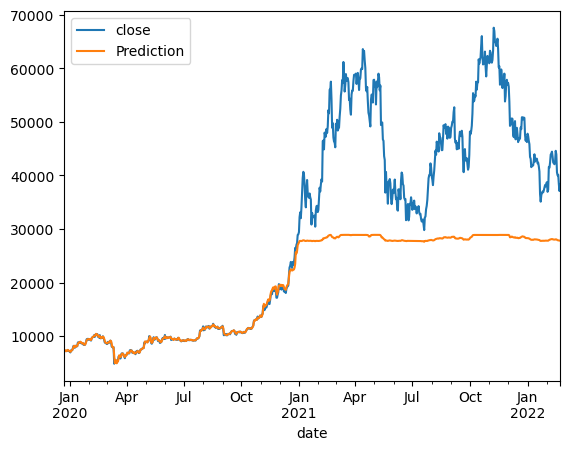

In [17]:
new_df.plot()

In [18]:
new_df.corr() # Accuracy around 99.5%

,close,Prediction
close,1.000000,0.935012
Prediction,0.935012,1.000000


In [19]:
test = X_Test[787:]

tests = reconstruct_model.predict(test)
tests =to_inverse_scale.inverse_transform(tests)
t = []
for i in range(len(tests)):
    t.append(tests[i][9])

t

1/1 [==============================] - 0s 29ms/step


[27966.945, 27896.72, 27881.668, 27848.94, 27822.656, 27807.523]